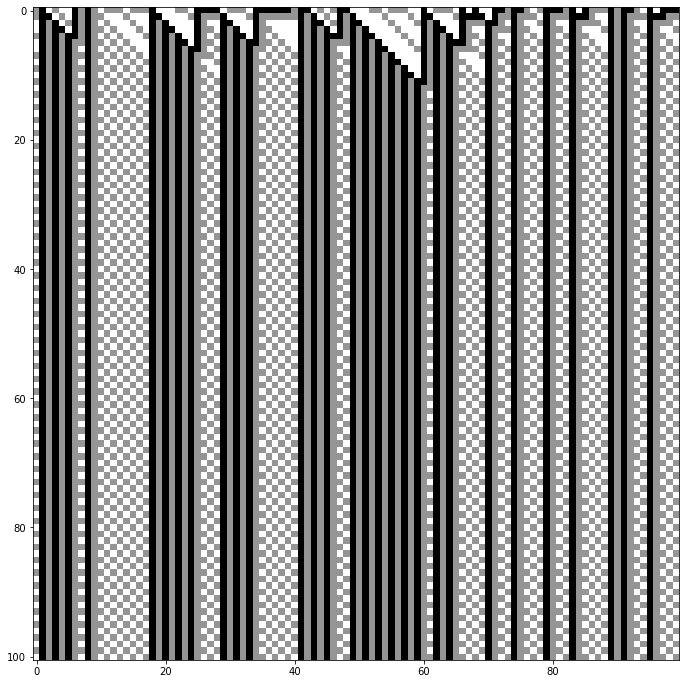

In [1]:
#Name: Rodrigo Becerra Silva
#Class: PHY250 
#Instructor: Lloyd Knox

# No function, no classes 3 state CA
import random
from matplotlib import pyplot as plt


################################################################################################################################
#program

length=100
time=100
rule_number=1777

# make the initial condition
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,2))

#Possible imputs (list of tuples)
neighborhoods=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]

#Convert rule number to ternary 
ter=[]

for x in range(9):
    
    ter.append(rule_number%3)
    rule_number=rule_number//3
    
values=ter[::-1] # reverse it for convention purposes

# Create look up table
lookup_table={}

for i in range(len(neighborhoods)):

    lookup_table.update({neighborhoods[i]:values[i]})
        
# initialize spacetime field and current configuration
spacetime_field = [initial_condition]
current_configuration = initial_condition.copy()

#run program
for t in range(time):
    
    #placeholder
    new_configuration=[]
    
    for i in range(length):
        neighborhood=(current_configuration[(i-1)],
                      current_configuration[i])
        
        new_configuration.append(lookup_table[neighborhood])
        
    spacetime_field.append(new_configuration)
        
    current_configuration=new_configuration
    
# plot the spacetime field diagram
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
plt.show()  

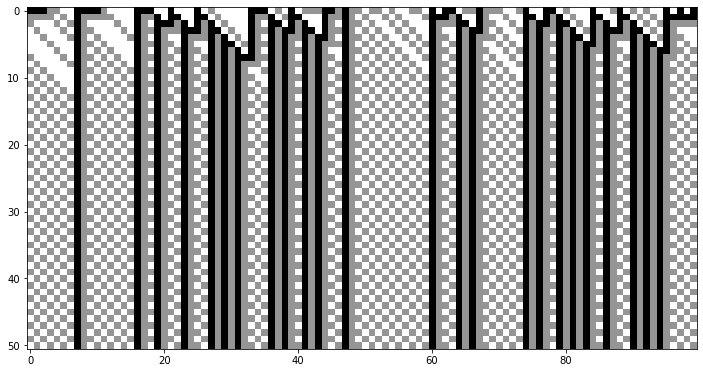

In [2]:
import random
from matplotlib import pyplot as plt


#Functions
def ter(n):
    '''
    Returns a list in  
    
    Parameters
    ----------
    number (n): int
        Posivite integer to be rewritten in base 3.
        
    Returns
    -------
    out: list
        Number return as a list.
    '''
    if not isinstance(n, int) or n < 0:
        raise ValueError("input number must be a positive ingeter")
    tr=[]
    
    for x in range(9):
        tr.append(n%3)
        n=n//3
    
    return tr

def create_lookup_table(rule_number):
    
    '''
    Returns a dict with the neighboorhood as the key 
    
    Parameters
    ----------
    rule_number: int
        Posivite integer to be rewritten in base 3.
        
    Returns
    -------
    out: dict
        Each key maps to the value depending of the rule number.
    '''
    if not isinstance(rule_number, int) or rule_number < 0 or rule_number > 19682:
        raise ValueError("rule_number must be an int between 0 and 19682, inclusive")
        

    #Possible imputs (list of tuples)
    neighborhoods=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
    values=ter(rule_number)[::-1] # reverse it for convention purposes
            
    return dict(zip(neighborhoods,values))
    

def plotting(field,size=12):
    plt.figure(figsize=(size,size))
    plt.imshow(field, cmap=plt.cm.Greys, interpolation='nearest')
    plt.show()
    
#Class

class ECA(object):
    
    def __init__(self, rule_number,initial_condition):
        
        #Public:
        self.initial=initial_condition
        self.lookup_table=create_lookup_table(rule_number)
        self.spacetime=[initial_condition]
        self.current_configuration=initial_condition.copy()
        
        #Private:
        self._length=len(initial_condition)
    
    def evolve(self,time_steps):
        #run program
        for t in range(time_steps):
    
            #placeholder
            new_configuration=[]
            for i in range(self._length):
                neighborhood=(self.current_configuration[(i-1)],
                              self.current_configuration[i])

                new_configuration.append(self.lookup_table[neighborhood])

            self.spacetime.append(new_configuration)

            self.current_configuration=new_configuration


################################################################################################################################
#program

length=100
time=50
rule_number=1777

# Create initial condition
initial_condition = list(random.randint(0,2) for _ in range(length))

program=ECA(rule_number,initial_condition)
program.evolve(time)

# plot the spacetime field diagram
plotting(program.spacetime)

In [1]:
!jupyter nbconvert --to script 3_state_CA.ipynb

[NbConvertApp] Converting notebook 3_state_CA.ipynb to script
[NbConvertApp] Writing 4452 bytes to 3_state_CA.py
